In [143]:
import numpy as np
import pandas as pd
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [144]:
%matplotlib inline

In [145]:
!pip install scikit-learn

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [223]:
data=pd.read_csv('heart_data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [224]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [225]:
print(data.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [226]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [227]:
data.shape

(303, 14)

### Mean

In [228]:
# Calculate mean for the entire DataFrame
print(data.mean())

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64


In [229]:
#mean for swpecific column
mean_age = data['age'].mean()
mean_age

54.366336633663366

### Median

In [230]:
# Calculate median for the entire DataFrame
median_values = data.median()
median_values

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [231]:
#median for specific column
median_age = data['chol'].median()
median_age

240.0

### standard deviation

In [232]:
# Calculate standard deviation for the entire DataFrame
std_dev_values = data.std()
std_dev_values

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

In [233]:
#std dev for specific column
std_dev_trestbps = data['trestbps'].std()
std_dev_trestbps

17.53814281351709

### Data cleaning

In [234]:
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [235]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [236]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA

### Univariate Analysis

In [238]:
#Numerical Variables Univariate Analysis

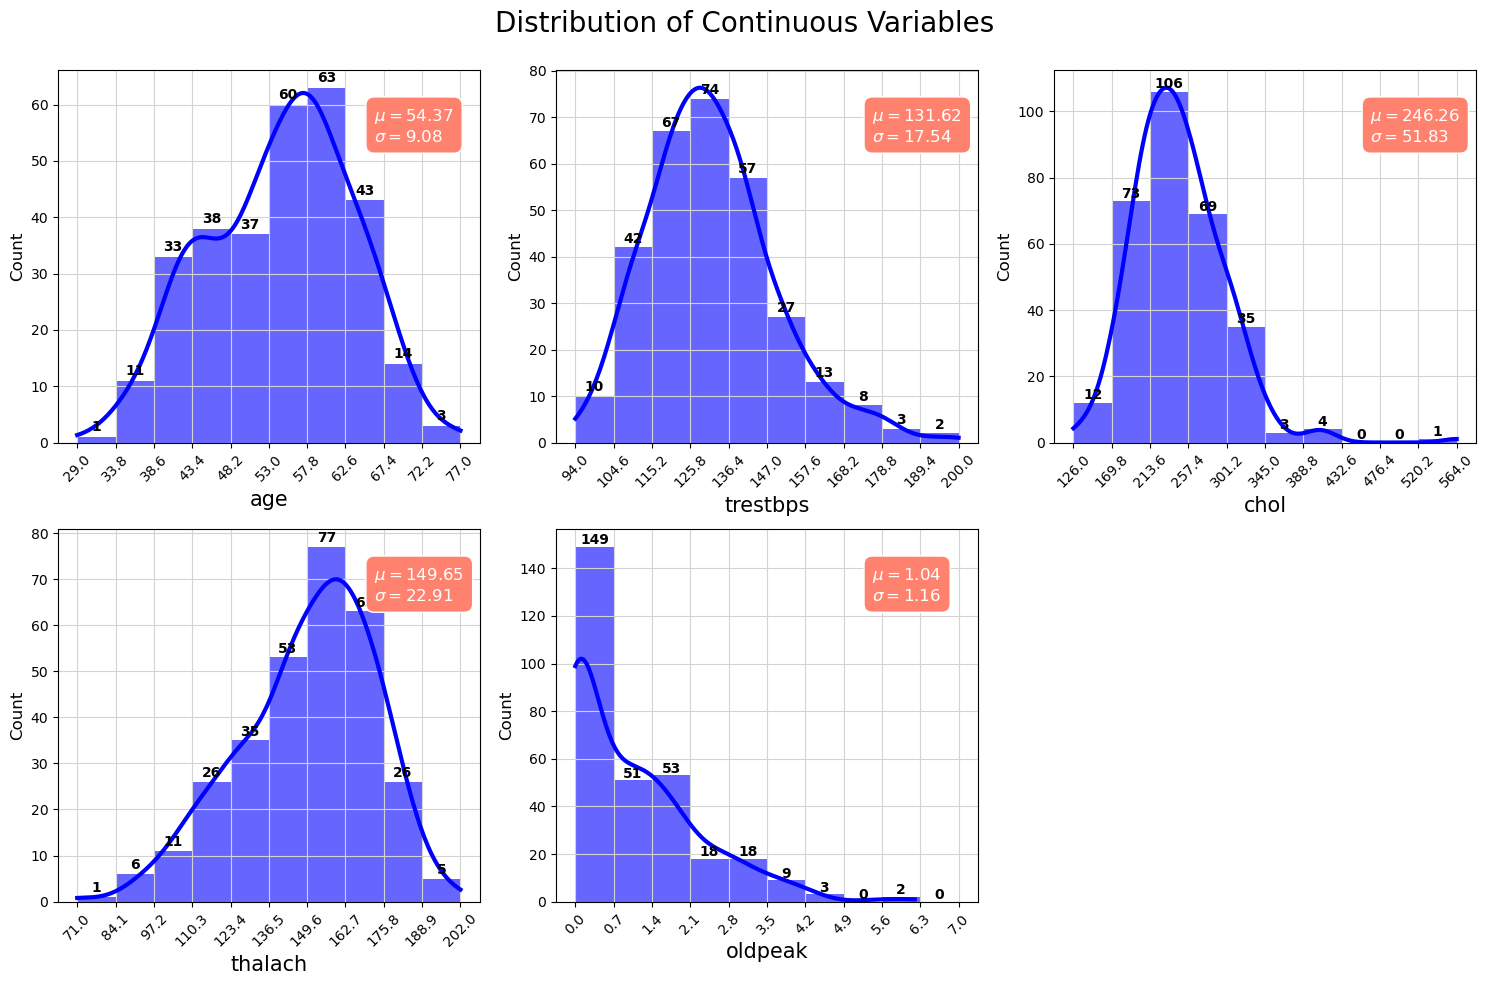

In [239]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_continuous = data[continuous_features]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, col in enumerate(data_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(data_continuous[col], 
                                     range=(np.floor(data_continuous[col].min()), np.ceil(data_continuous[col].max())))
    graph = sns.histplot(data=data_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='blue', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
        textstr = '\n'.join((
        r'$\mu=%.2f$' % data_continuous[col].mean(),
        r'$\sigma=%.2f$' % data_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [240]:
#Categorical Variables Univariate Analysis

In [241]:
categorical_features = data.columns.difference(continuous_features)
data_categorical = data[categorical_features]

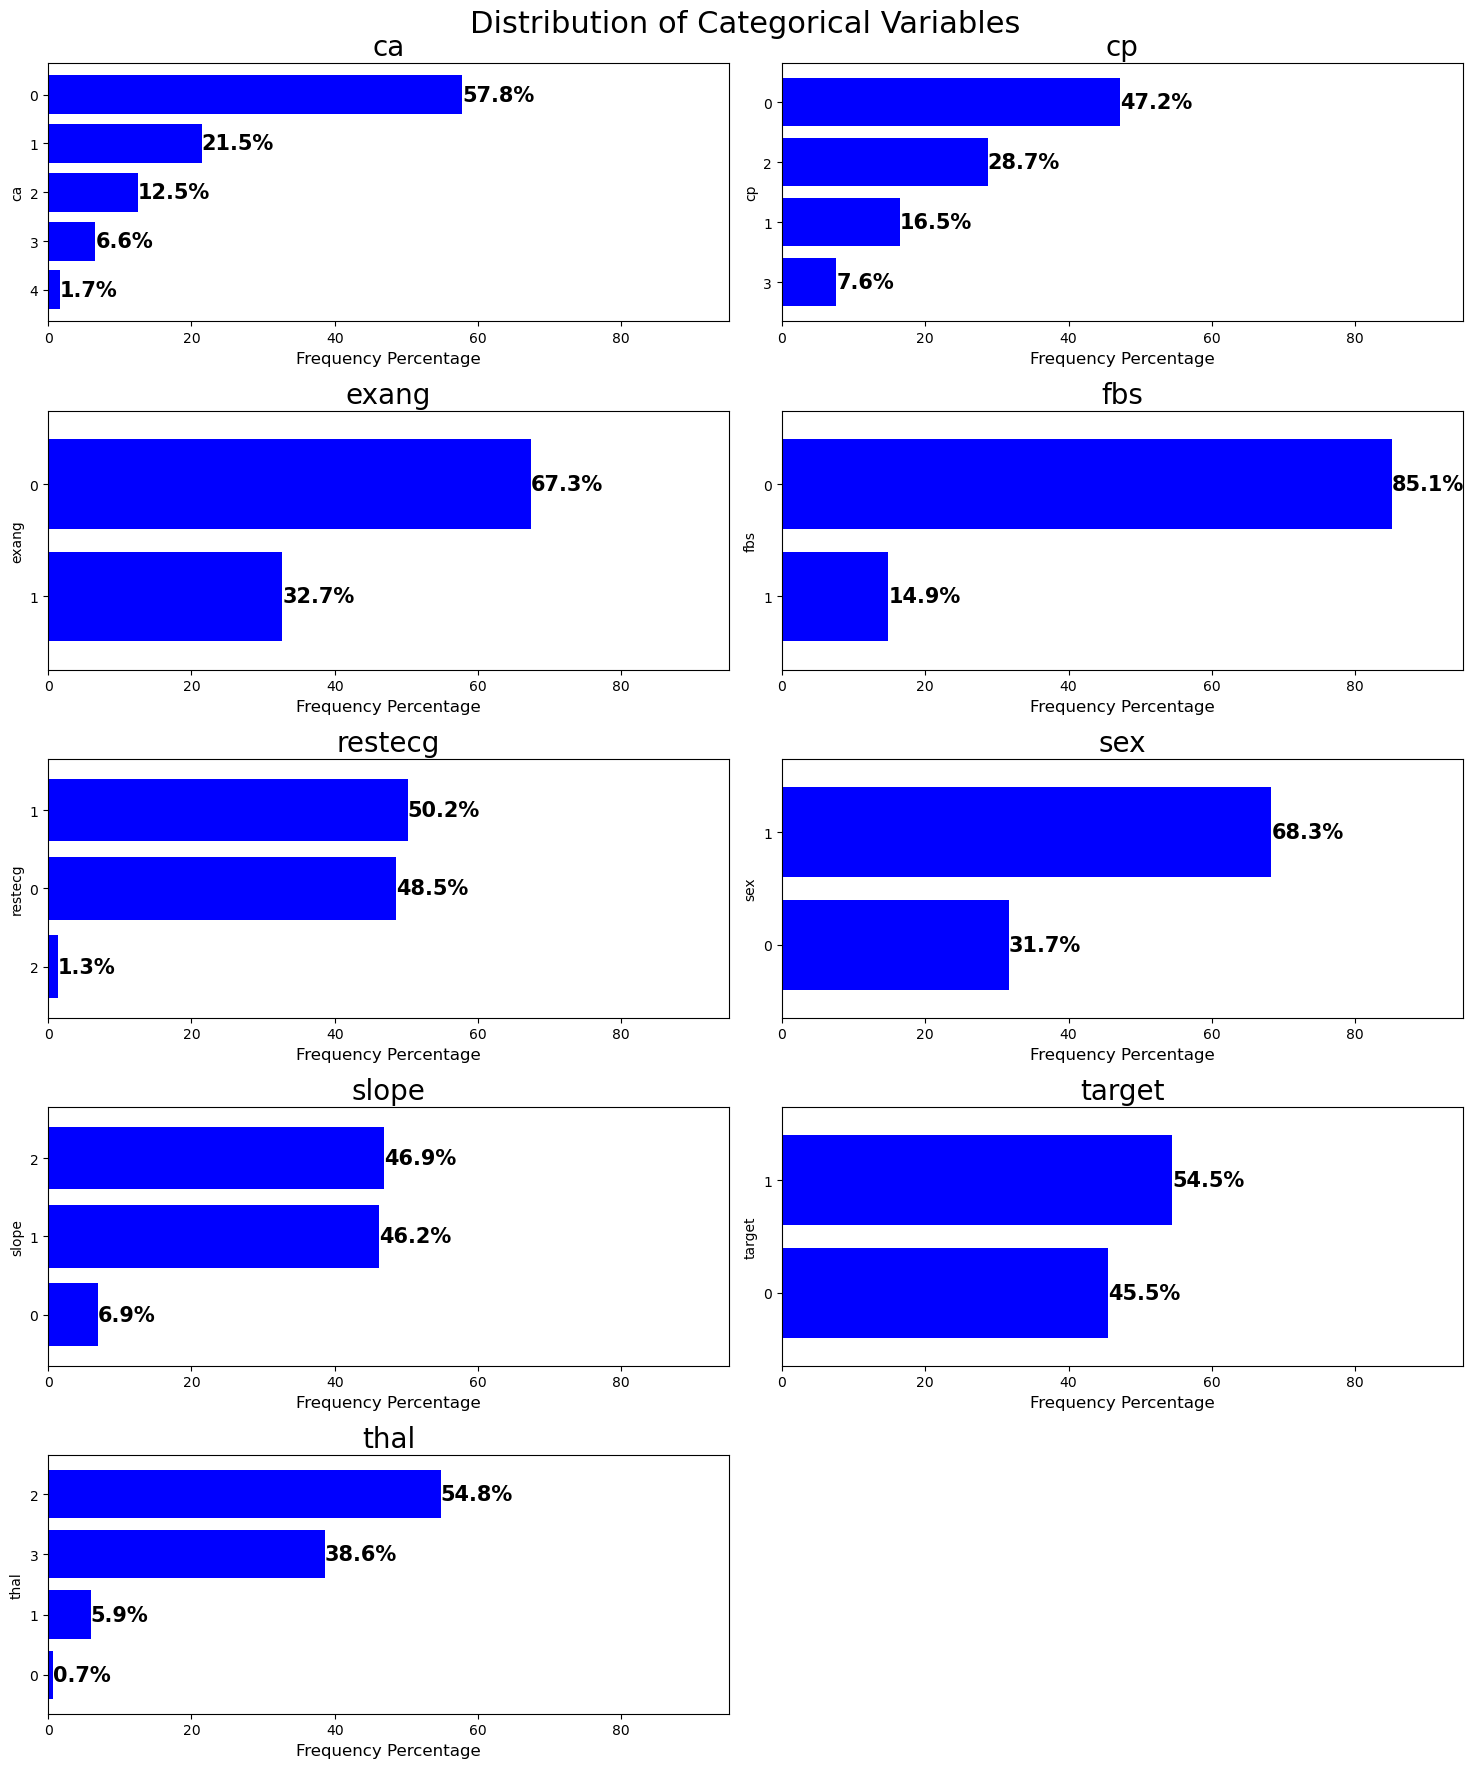

In [242]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))


for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
   
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()
    
    
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='blue')
    
    
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Bivariate Analysis

In [243]:
#Numerical Features vs Targe

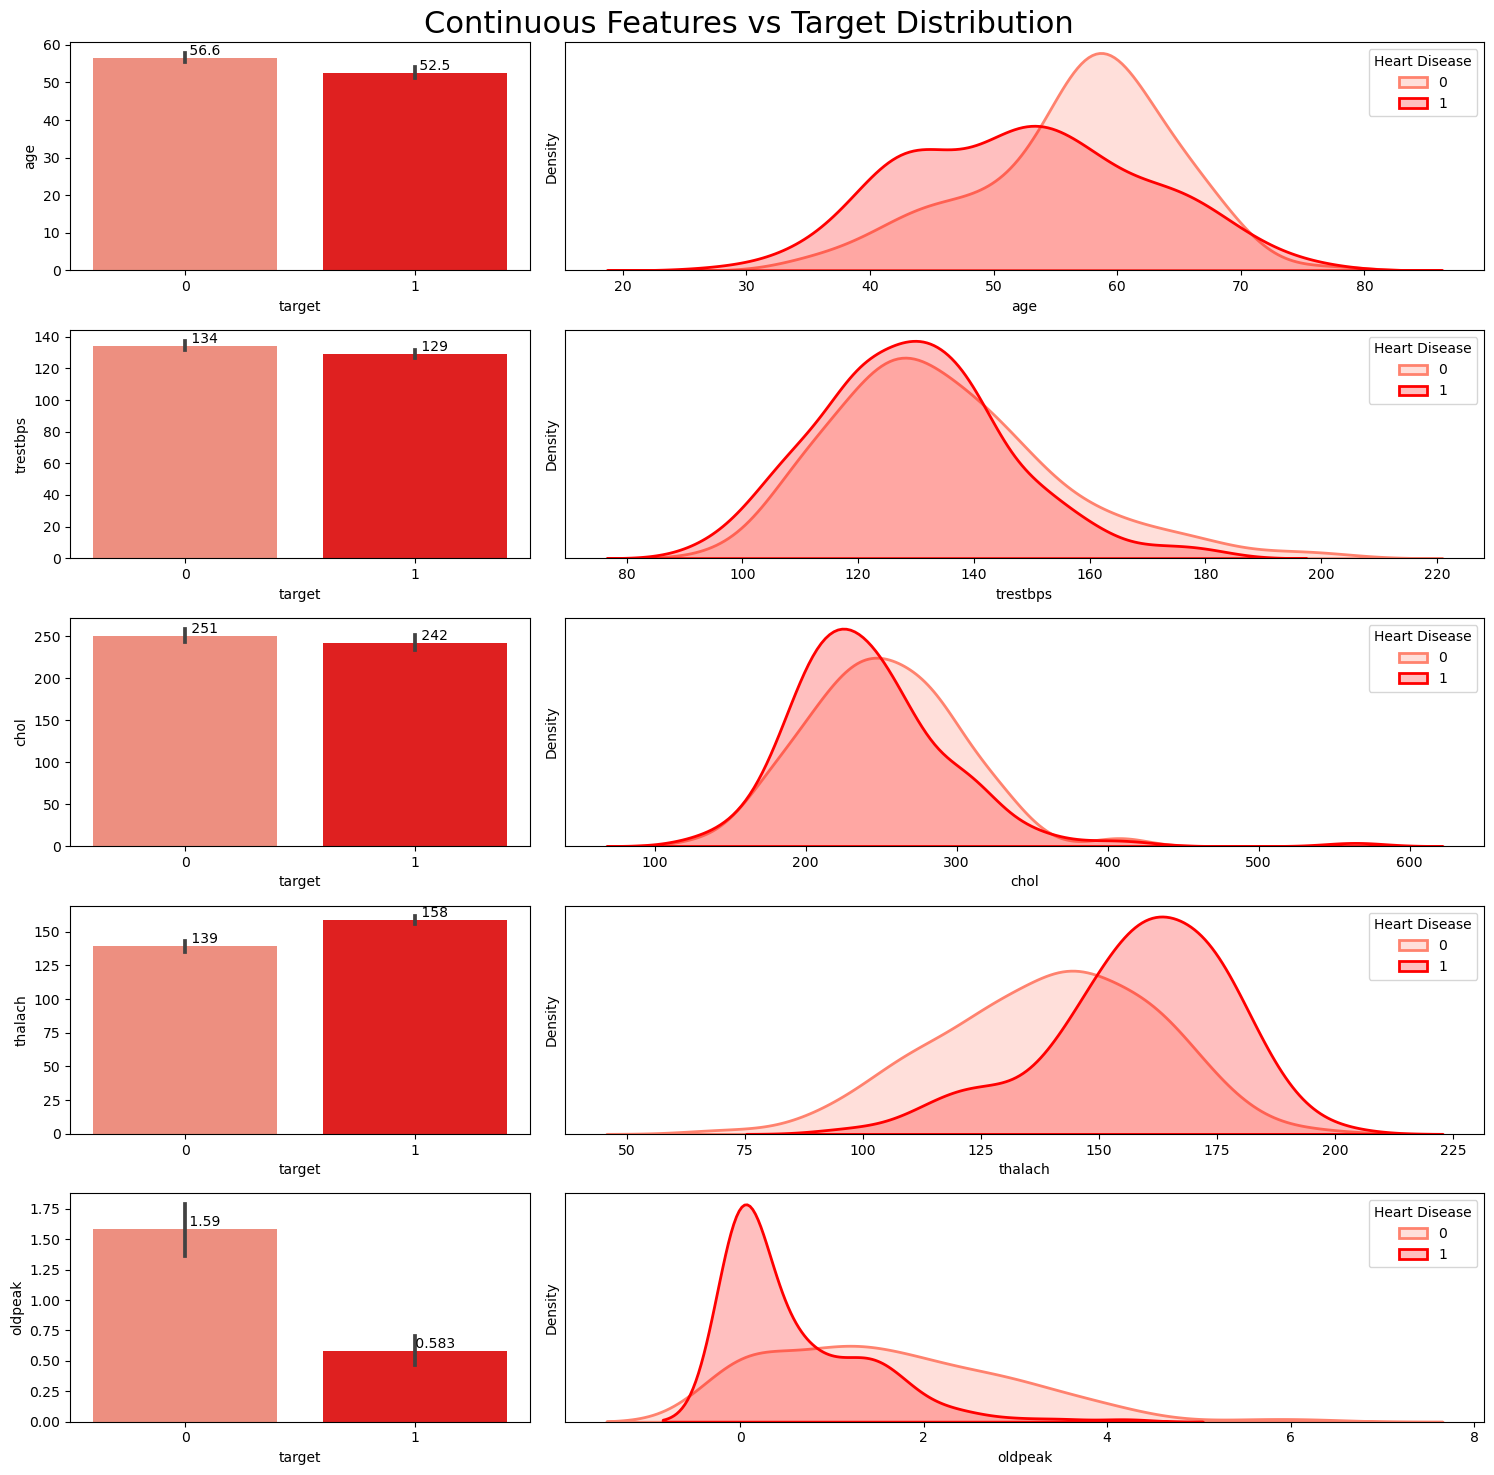

In [244]:
sns.set_palette(['#ff826e', 'red'])

fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=data, x="target", y=col, ax=ax[i,0])
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=data[data["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=data[data["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        

plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout() 
plt.show()

In [245]:
#Categorical Features vs Target

In [246]:
categorical_features = [feature for feature in categorical_features if feature != 'target']

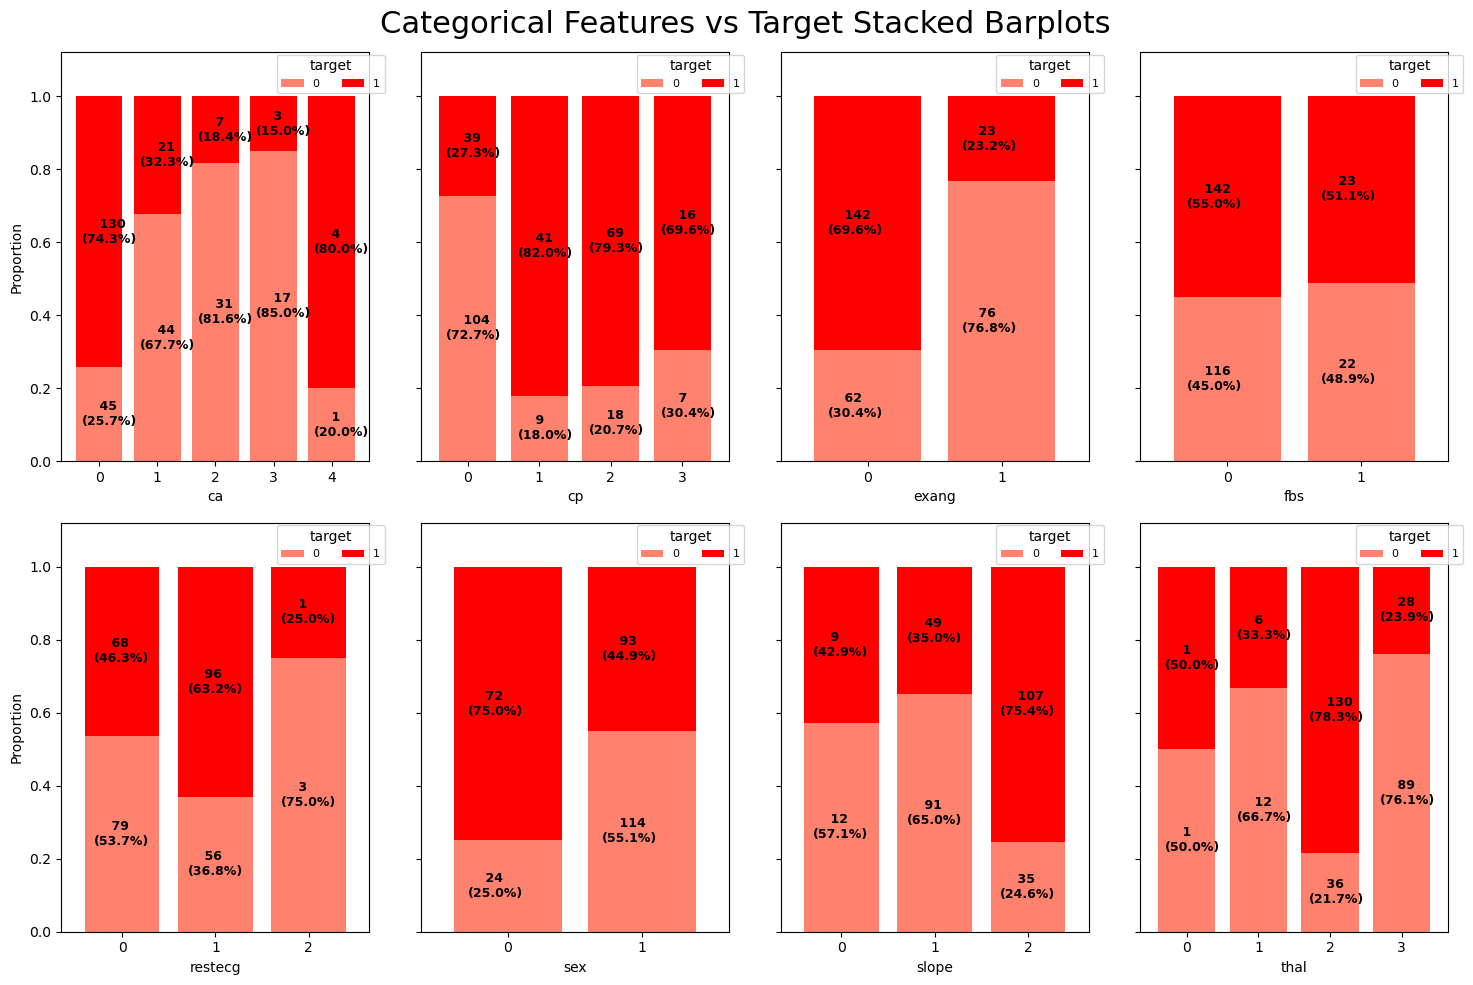

In [247]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=data[col], columns=data['target'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=data[col], columns=data['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
     # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
            # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

In [248]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [249]:
 X=data.drop('target',axis=1)
 Y=data['target']


In [250]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [251]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [252]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Assuming you have your features in X and labels in Y

# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=42)

# # Initialize the Logistic Regression model
# model = LogisticRegression(max_iter=1000)

# # Train the model
# model.fit(X_train, Y_train)

# # Make predictions on the training set
# train_predictions = model.predict(X_train)

# # Calculate training accuracy
# train_accuracy = accuracy_score(train_predictions, Y_train)
# print("Training Accuracy:", train_accuracy)

# # Make predictions on the testing set
# test_predictions = model.predict(X_test)

# # Calculate testing accuracy
# test_accuracy = accuracy_score(test_predictions, Y_test)
# print("Testing Accuracy:", test_accuracy)


In [253]:
#  X_train, X_test, Y_train, Y_test = train_test_split(  X, Y, test_size=0.2,stratify=Y, random_state=42)

# LOGISTIC REGRESSION

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [255]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [256]:
 X_train.shape

(242, 13)

In [257]:
X_test.shape

(61, 13)

In [258]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)


LogisticRegression(max_iter=1000)

In [259]:
 train_Y_pred = model.predict(X_train)
 accuracy_score(train_Y_pred,Y_train)

0.8636363636363636

In [260]:
train_Y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1],
      dtype=int64)

In [261]:
Y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [262]:
test_Y_pred = model.predict(X_test)
accuracy_score(test_Y_pred,Y_test)

0.8852459016393442

In [300]:
prediction = model.predict([[34,0,1,118,210,0,1,192,0,0.7,2,0,2]])

# Print the prediction
if prediction[0] == 1:
    print("The person is predicted to have heart disease.")
else:
    print("The person is predicted to not have heart disease.")

The person is predicted to have heart disease.


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [301]:
prediction = model.predict([[46,1,0,140,311,0,1,120,1,1.8,1,2,3]])

# Print the prediction
if prediction[0] == 1:
    print("The person is predicted to have heart disease.")
else : 
    print("The person is predicted not to have heart disease.")

The person is predicted not to have heart disease.


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## confusion matrix

In [265]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score

In [266]:
logistic_predictions = model.predict(X_test)

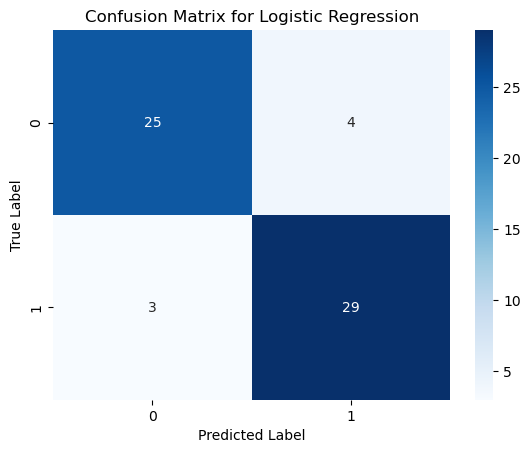

In [267]:
cm = confusion_matrix(Y_test, logistic_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


## ROC Curve

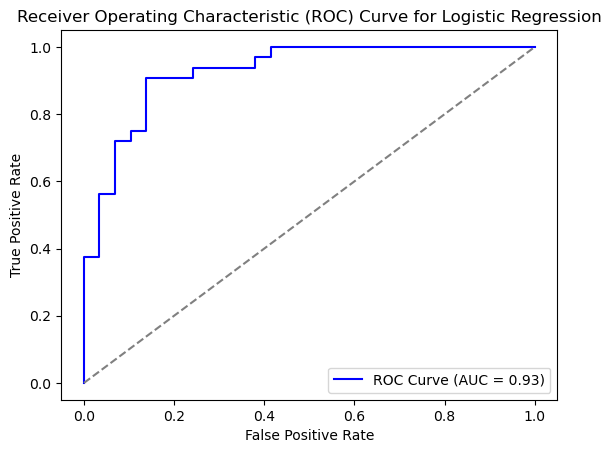

In [268]:
# Get probabilities of positive class from the logistic regression model
logistic_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, logistic_probs)

auc_score = roc_auc_score(Y_test, logistic_probs)

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()


## precision recall curve

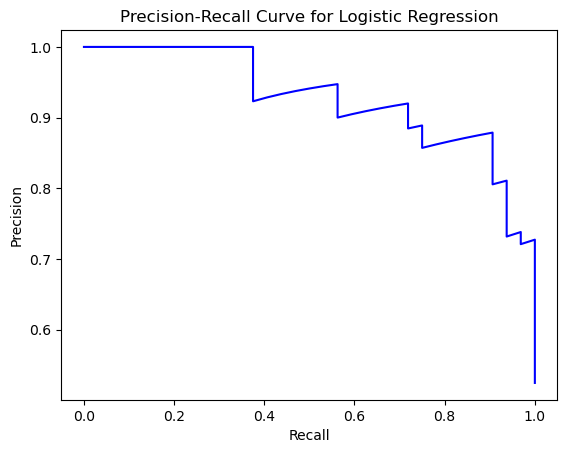

In [269]:
precision, recall, thresholds = precision_recall_curve(Y_test, logistic_probs)

plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.show()


# DECISION TREES

In [270]:
from PIL import Image

In [271]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, Y_train)


DecisionTreeClassifier()

In [272]:
Y_pred = clf.predict(X_test)

In [273]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [274]:
# Calculate accuracy

In [275]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8360655737704918


In [281]:
from sklearn.tree import DecisionTreeClassifier


input_data = [[46,1,0,140,311,0,1,120,1,1.8,1,2,3]] 


predictions = clf.predict(input_data)


if predictions[0] == 0:
    print("This person doesn't have heart disease.")
else:
    print("This person has heart disease.")


This person doesn't have heart disease.


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [303]:
from sklearn.tree import DecisionTreeClassifier


input_data = [[34,0,1,118,210,0,1,192,0,0.7,2,0,2]] 


predictions = clf.predict(input_data)


if predictions[0] == 0:
    print("This person doesn't have heart disease.")
else:
    print("This person have heart disease.")

This person have heart disease.


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [304]:
# Confusion matrix

In [305]:
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Confusion Matrix:
[[26  3]
 [ 7 25]]


In [306]:
from sklearn.tree import plot_tree

## Plot decision tree structure

In [307]:
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=['No Heart Disease', 'Heart Disease'])
plt.show()


InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object') instead.

<Figure size 2000x1000 with 0 Axes>

## ROC Curve

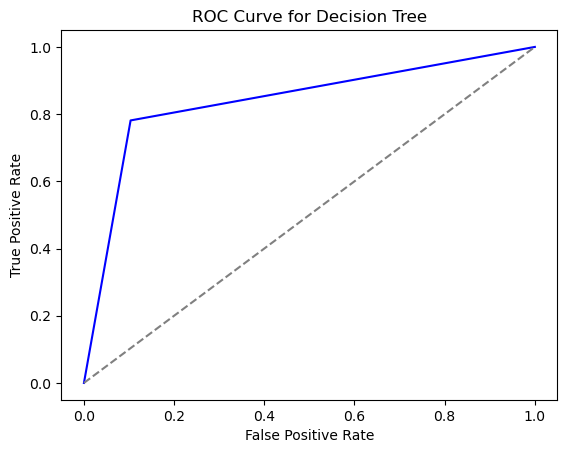

In [308]:
dt_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, dt_probs)
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.show()


# RANDOM FOREST

In [309]:
# import random forest classifier

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [311]:
# initialise the classifier

In [312]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [313]:
# Train the model

In [314]:
rf_classifier.fit(X,Y)

RandomForestClassifier(random_state=42)

In [315]:
rf_predictions = rf_classifier.predict(X_test)

In [316]:
#calculate accuracy

In [317]:
rf_accuracy = accuracy_score(Y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 1.0


In [318]:
from sklearn.ensemble import RandomForestClassifier


input_data = [[46,1,0,140,311,0,1,120,1,1.8,1,2,3]]  


predictions = rf_classifier.predict(input_data)


if predictions[0] == 0:
    print("This person doesn't have heart disease.")
else:
    print("This person has heart disease.")


This person doesn't have heart disease.


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [342]:
from sklearn.ensemble import RandomForestClassifier


input_data = [[34,0,1,118,210,0,1,192,0,0.7,2,0,2]]  


predictions = rf_classifier.predict(input_data)


if predictions[0] == 0:
    print("This person doesn't have heart disease.")
else:
    print("This person has heart disease.")


This person has heart disease.


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## feature importance

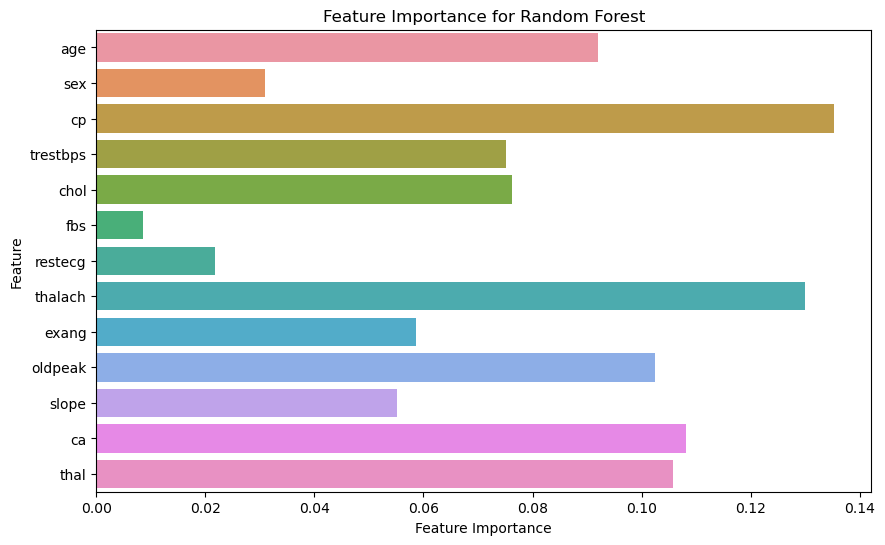

In [322]:
feature_importance = rf_classifier.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()

## partial dependence plot

In [323]:
from sklearn.inspection import plot_partial_dependence

features = ['age', 'chol', 'thalach']
plot_partial_dependence(rf_classifier, X_train, features)
plt.suptitle('Partial Dependence Plots')
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\inspection\__init__.py)

In [324]:
#multiplying two existing features

In [325]:
data['new_feature'] = data['age'] * data['chol'] 
data['new_feature']

0      14679
1       9250
2       8364
3      13216
4      20178
       ...  
298    13737
299    11880
300    13124
301     7467
302    13452
Name: new_feature, Length: 303, dtype: int64

In [326]:
#convert from int to float

In [327]:
data['age'] = data['age'].astype(float)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,new_feature
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,14679
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1,9250
2,41.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1,8364
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1,13216
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1,20178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1,0,3,0,13737
299,45.0,1,3,110,264,0,1,132,0,1.2,1,0,3,0,11880
300,68.0,1,0,144,193,1,1,141,0,3.4,1,2,3,0,13124
301,57.0,1,0,130,131,0,1,115,1,1.2,1,1,3,0,7467


In [328]:
#join trestbps and age

In [329]:
trestbps_age = pd.concat([data['trestbps'], data['age']], axis=1)

trestbps_age_series = pd.concat([data['trestbps'], data['age']], axis=0)

print(trestbps_age)

     trestbps   age
0         145  63.0
1         130  37.0
2         130  41.0
3         120  56.0
4         120  57.0
..        ...   ...
298       140  57.0
299       110  45.0
300       144  68.0
301       130  57.0
302       130  57.0

[303 rows x 2 columns]


In [330]:
#groupby sex

In [331]:
grouped_data = data.groupby('sex').mean()

print(grouped_data)

           age        cp    trestbps        chol      fbs   restecg  \
sex                                                                   
0    55.677083  1.041667  133.083333  261.302083  0.12500  0.572917   
1    53.758454  0.932367  130.946860  239.289855  0.15942  0.507246   

        thalach     exang   oldpeak     slope        ca      thal    target  \
sex                                                                           
0    151.125000  0.229167  0.876042  1.427083  0.552083  2.125000  0.750000   
1    148.961353  0.371981  1.115459  1.386473  0.811594  2.400966  0.449275   

      new_feature  
sex                
0    14706.447917  
1    12923.985507  


### Hypothesis Generation

In [332]:
#There is a positive correlation between age and cholesterol levels.

In [333]:
import pandas as pd

correlation_coefficient = data['age'].corr(data['chol'])

print("Correlation coefficient between age and cholesterol levels:", correlation_coefficient)

Correlation coefficient between age and cholesterol levels: 0.2136779565595619


In [334]:
#Visualize the relationship between age and cholesterol levels using scatter plot

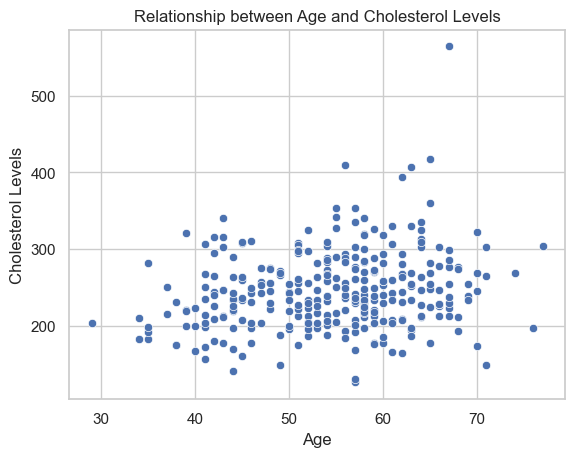

In [335]:
sns.set(style="whitegrid")  

sns.scatterplot(x='age', y='chol', data=data)

plt.title('Relationship between Age and Cholesterol Levels')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.show()

In [336]:
#Older individuals are more likely to have heart disease:

In [337]:
#Calculate the prevalence of heart disease among different age groups.
bins = [0, 40, 50, 60, 70, 80, 100]
labels = ['<40', '40-49', '50-59', '60-69', '70-79', '80+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

prevalence_by_age_group = data.groupby('age_group')['target'].mean()

print(prevalence_by_age_group)


age_group
<40      0.750000
40-49    0.694444
50-59    0.520000
60-69    0.400000
70-79    0.600000
80+           NaN
Name: target, dtype: float64


### taking input from user

In [339]:
# Assuming you have instantiated and trained the Logistic Regression classifier
logistic_regression_model = LogisticRegression()

# Fit the model with training data
logistic_regression_model.fit(X_train, Y_train)


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [340]:
from sklearn.preprocessing import StandardScaler


logistic_regression_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()


scaler = StandardScaler()  
scaler.fit(X)


age = int(input("Enter age: "))
sex = int(input("Enter sex (0 for female, 1 for male): "))
cp = int(input("Enter chest pain type (0-3): "))
trestbps = int(input("Enter resting blood pressure: "))
chol = int(input("Enter serum cholesterol level: "))
fbs = int(input("Enter fasting blood sugar > 120 mg/dl (1 for True, 0 for False): "))
restecg = int(input("Enter resting electrocardiographic results (0-2): "))
thalach = int(input("Enter maximum heart rate achieved: "))
exang = int(input("Enter exercise induced angina (1 for Yes, 0 for No): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = int(input("Enter slope of the peak exercise ST segment (0-2): "))
ca = int(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
thal = int(input("Enter thalassemia (0-3): "))

user_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]
user_data_scaled = scaler.transform(user_data)

logistic_regression_prediction = model.predict(user_data_scaled)
decision_tree_prediction = clf.predict(user_data)
random_forest_prediction = rf_classifier.predict(user_data)

def interpret_prediction(prediction):
    if prediction == 0:
        return "No Heart Disease"
    elif prediction == 1:
        return "Heart Disease"


print("Logistic Regression Prediction:", interpret_prediction(logistic_regression_prediction))
print("Decision Tree Prediction:", interpret_prediction(decision_tree_prediction))
print("Random Forest Prediction:", interpret_prediction(random_forest_prediction))


Enter age: 34
Enter sex (0 for female, 1 for male): 0
Enter chest pain type (0-3): 1
Enter resting blood pressure: 118
Enter serum cholesterol level: 210
Enter fasting blood sugar > 120 mg/dl (1 for True, 0 for False): 0
Enter resting electrocardiographic results (0-2): 1
Enter maximum heart rate achieved: 192
Enter exercise induced angina (1 for Yes, 0 for No): 0
Enter ST depression induced by exercise relative to rest: 0.7
Enter slope of the peak exercise ST segment (0-2): 2
Enter number of major vessels (0-3) colored by fluoroscopy: 0
Enter thalassemia (0-3): 2
Logistic Regression Prediction: Heart Disease
Decision Tree Prediction: Heart Disease
Random Forest Prediction: Heart Disease


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [343]:
from sklearn.preprocessing import StandardScaler


logistic_regression_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
random_forest_model = RandomForestClassifier()


scaler = StandardScaler()  
scaler.fit(X)


age = int(input("Enter age: "))
sex = int(input("Enter sex (0 for female, 1 for male): "))
cp = int(input("Enter chest pain type (0-3): "))
trestbps = int(input("Enter resting blood pressure: "))
chol = int(input("Enter serum cholesterol level: "))
fbs = int(input("Enter fasting blood sugar > 120 mg/dl (1 for True, 0 for False): "))
restecg = int(input("Enter resting electrocardiographic results (0-2): "))
thalach = int(input("Enter maximum heart rate achieved: "))
exang = int(input("Enter exercise induced angina (1 for Yes, 0 for No): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = int(input("Enter slope of the peak exercise ST segment (0-2): "))
ca = int(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
thal = int(input("Enter thalassemia (0-3): "))

user_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]
user_data_scaled = scaler.transform(user_data)

logistic_regression_prediction = model.predict(user_data_scaled)
decision_tree_prediction = clf.predict(user_data)
random_forest_prediction = rf_classifier.predict(user_data)

def interpret_prediction(prediction):
    if prediction == 0:
        return "No Heart Disease"
    elif prediction == 1:
        return "Heart Disease"


print("Logistic Regression Prediction:", interpret_prediction(logistic_regression_prediction))
print("Decision Tree Prediction:", interpret_prediction(decision_tree_prediction))
print("Random Forest Prediction:", interpret_prediction(random_forest_prediction))


Enter age: 46
Enter sex (0 for female, 1 for male): 1
Enter chest pain type (0-3): 0
Enter resting blood pressure: 140
Enter serum cholesterol level: 311
Enter fasting blood sugar > 120 mg/dl (1 for True, 0 for False): 0
Enter resting electrocardiographic results (0-2): 1
Enter maximum heart rate achieved: 120
Enter exercise induced angina (1 for Yes, 0 for No): 1
Enter ST depression induced by exercise relative to rest: 1.8
Enter slope of the peak exercise ST segment (0-2): 1
Enter number of major vessels (0-3) colored by fluoroscopy: 2
Enter thalassemia (0-3): 3
Logistic Regression Prediction: No Heart Disease
Decision Tree Prediction: No Heart Disease
Random Forest Prediction: No Heart Disease


C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\radhi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
